##### OpenCV 人臉偵測
這篇教學會介紹使用 OpenCV，搭配官方提供的人臉特徵模型，偵測影像中的人臉，並透過繪製形狀的方式，\
使用方框標記偵測到的人臉，實現類似 AI 影像辨識的效果。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 下載人臉特徵模型 
OpenCV 的官方 Github 提供了許多訓練好的特徵模型，只需要下載後就能使用，請從下方網址進行下載，\
下載後將 xml 檔案和 Python 的程式檔放在同一層目錄下。

* [OpenCV 官方 Github](https://github.com/opencv/opencv/tree/4.x/data)
* [人臉特徵模型](haarcascade_frontalface_default.xml)

##### 偵測影像中的人臉 
OpenCV 裡的 CascadeClassifier() 方法 ( 級聯分類器 )，可以根據所提供的模型檔案，判斷某個事件是否屬於某種結果，\
例如偵測人臉，如果影像中符合模型所定義的人臉屬性，就會出現這個人臉對應的屬性 ( 座標、尺寸...等 )。

使用 CascadeClassifier() 後，會再透過 detectMultiScale() 進行偵測，如果偵測到臉，就會將偵測到的屬性輸出 ( 串列與字典形式 )，\
相關用法如下：

In [ ]:
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
# 設定集聯分類器為人臉的模型 ( haarcascade_frontalface_default.xml )

faces = face_cascade.detectMultiScale(img, scaleFactor, minNeighbors, flags, minSize, maxSize)
# 偵測並取出相關屬性
# img 來源影像，建議使用灰階影像
# scaleFactor 前後兩次掃瞄偵測畫面的比例係數，預設 1.1
# minNeighbors 構成檢測目標的相鄰矩形的最小個數，預設 3
# flags 通常不用設定，若設定 CV_HAAR_DO_CANNY_PRUNING 會使用 Canny 邊緣偵測，排除邊緣過多或過少的區域
# minSize, maxSize 限制目標區域的範圍，通常不用設定

下方的例子執行後，會偵測蒙娜麗莎的人臉，並透過繪製形狀的方式，使用方框標記偵測到的人臉，如果有發生偵測到不是人臉的形狀\
( 例如鈕扣和陰影組合成很像人臉的 )，可以調整 scaleFactor 和 minNeighbors 參數再重新偵測。

* 參考：cvtcolor() 色彩轉換、rectangle() 畫四邊形、for 迴圈

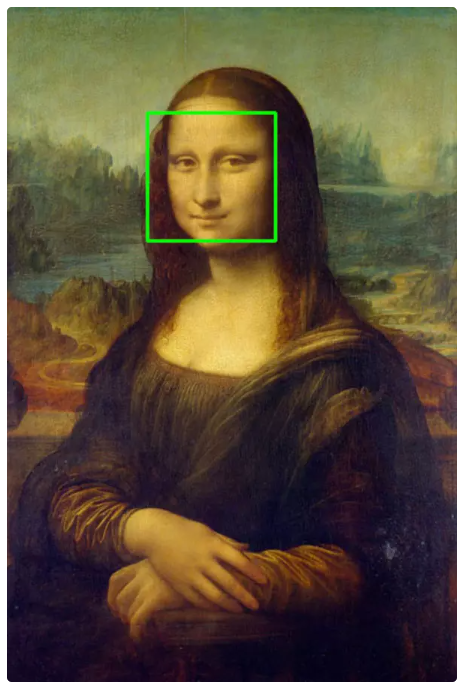

In [60]:
import cv2

# 讀取圖像
img = cv2.imread(r'Img\Face\3.jpg')
# 將圖片縮小2倍
img_resized = cv2.resize(img, (img.shape[1] // 2, img.shape[0] // 2))

gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)   # 將圖片轉成灰階

face_cascade = cv2.CascadeClassifier(r"Img\Face\haarcascade_frontalface_default.xml")   # 載入人臉模型
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.7, minNeighbors=6)    # 偵測人臉

for (x, y, w, h) in faces:
    cv2.rectangle(img_resized, (x, y), (x+w, y+h), (0, 255, 0), 2)    # 利用 for 迴圈，抓取每個人臉屬性，繪製

cv2.imshow('oxxostudio', img_resized)
cv2.waitKey(0) # 按下任意鍵停止
cv2.destroyAllWindows()

如果有多張人臉，也可以順利偵測並標記 ( 圖片為 Fusilamientos de Torrijos y sus compañeros en las playas de Málaga )。

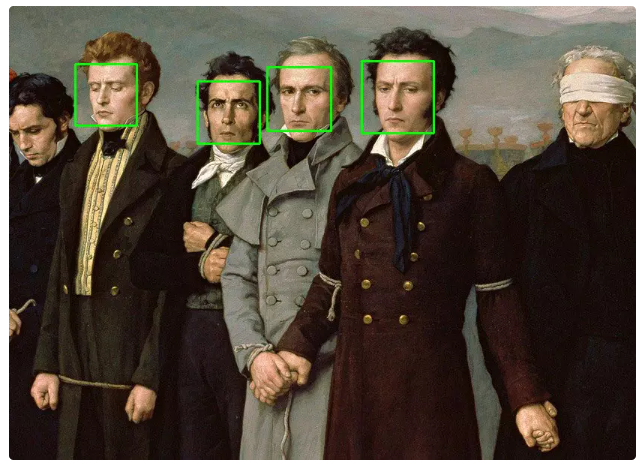

##### 即時偵測影片中的人臉 
延伸「讀取並播放影片」文章的範例，搭配人臉偵測的方法，就可以即時偵測攝影鏡頭裡的人臉。

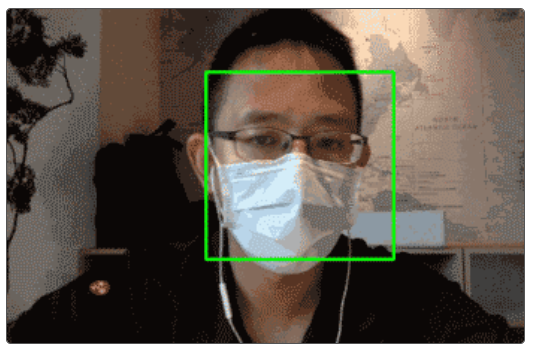

In [2]:
import cv2

# 初始化攝像頭
cap = cv2.VideoCapture(0)

# 載入人臉偵測模型
face_cascade = cv2.CascadeClassifier(r"Model/2/haarcascade_frontalface_default.xml")

# 檢查攝像頭是否打開
if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    # 讀取影像
    ret, frame = cap.read()
    if not ret:
        print("Cannot receive frame")
        break

    # 縮小尺寸，避免尺寸過大導致效能不好
    frame = cv2.resize(frame, (540, 320))

    # 將鏡頭影像轉換成灰階
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 偵測人臉
    faces = face_cascade.detectMultiScale(gray)

    # 標記人臉
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # 顯示影像
    cv2.imshow('oxxostudio', frame)

    # 按下 'q' 鍵退出
    if cv2.waitKey(1) == ord('q'):
        break

# 釋放攝像頭並關閉所有視窗
cap.release()
cv2.destroyAllWindows()